In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_07_23/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

Mounted at /content/drive


In [3]:
data.head(20)

,Last Occurred On,Alarm Source,Alarm Severity,Alarm Name,Alarm ID,Alarm Location Info,Site Name,Cleared On,First Occurred On,Clearance Status,Ticket ID,Site ID,Vendor,Domain,Device Type
0,2024-07-24 08:13:35,EKIYKU1BD0049G,Major,OML FAULT BTS DOWN,NaN,"ManagedElement=EUPLRB2,BssFunction=BSS_Managed...",Ekiriyankumbura,2024-07-24 08:33:16,2024-07-24 08:13:35,Cleared,TT-20240724-00000118,BD0049,ERICSSON,Access,BTS
1,2024-07-24 07:54:01,BERUSO1KL0003G,Minor,Cell Quality Degraded,NaN,"ManagedElement=EPILRB4,BssFunction=BSS_Managed...",Beruwala_South,2024-07-24 08:09:01,2024-07-24 07:54:01,Cleared,TT-20240724-00000115,KL0003,ERICSSON,Access,BTS
2,2024-07-24 07:44:20,MC2_Ethiligoda1-GA0161-HP,Major,Service Unavailable,NaN,"ManagedElement=MC2_Ethiligoda1-GA0161-HP,ENode...",Ethiligoda,2024-07-24 07:45:35,2024-07-24 00:06:50,Cleared,TT-20240724-00000016,GA0161,ERICSSON,Access,eNodeB
3,2024-07-24 07:44:20,MC2_Ethiligoda1-GA0161-HP,Major,Service Unavailable,NaN,"ManagedElement=MC2_Ethiligoda1-GA0161-HP,ENode...",Ethiligoda,2024-07-24 07:45:32,2024-07-24 00:06:50,Cleared,TT-20240724-00000016,GA0161,ERICSSON,Access,eNodeB
4,2024-07-24 07:44:20,MC2_Ethiligoda1-GA0161-HP,Major,Service Unavailable,NaN,"ManagedElement=MC2_Ethiligoda1-GA0161-HP,ENode...",Ethiligoda,2024-07-24 07:45:30,2024-07-24 00:06:50,Cleared,TT-20240724-00000016,GA0161,ERICSSON,Access,eNodeB
5,2024-07-24 07:44:20,MC2_Ethiligoda1-GA0161-HP,Major,Service Unavailable,NaN,"ManagedElement=MC2_Ethiligoda1-GA0161-HP,ENode...",Ethiligoda,2024-07-24 07:45:36,2024-07-24 00:06:50,Cleared,TT-20240724-00000016,GA0161,ERICSSON,Access,eNodeB
6,2024-07-24 07:44:20,MC2_Ethiligoda1-GA0161-HP,Major,Service Unavailable,NaN,"ManagedElement=MC2_Ethiligoda1-GA0161-HP,ENode...",Ethiligoda,2024-07-24 07:45:33,2024-07-24 00:06:50,Cleared,TT-20240724-00000016,GA0161,ERICSSON,Access,eNodeB
7,2024-07-24 07:44:20,MC2_Ethiligoda1-GA0161-HP,Major,Service Unavailable,NaN,"ManagedElement=MC2_Ethiligoda1-GA0161-HP,ENode...",Ethiligoda,2024-07-24 07:45:34,2024-07-24 00:06:50,Cleared,TT-20240724-00000016,GA0161,ERICSSON,Access,eNodeB
8,2024-07-24 07:39:52,Dandeniya-MR0164-BGHP,Major,Service Unavailable,NaN,"ManagedElement=Dandeniya-MR0164-BGHP,ENodeBFun...",Dandeniya,2024-07-24 07:41:14,2024-07-24 00:45:56,Cleared,TT-20240724-00000026,MR0164,ERICSSON,Access,eNodeB
9,2024-07-24 07:36:23,GINELD1MR0198D,Critical,Cell Out of Service,23801,"ManagedElement=EAKBRB1,BssFunction=BSS_Managed...",Ginneliya,2024-07-24 07:52:53,2024-07-24 07:36:23,Cleared,TT-20240413-00000085,MR0198,ERICSSON,Access,NaN


In [4]:
# Sort by 'First Occurred On' in descending order (latest alarms first)
data = data.sort_values(by='First Occurred On', ascending=False)

# Convert 'First Occurred On' to datetime
data['First Occurred On'] = pd.to_datetime(data['First Occurred On'])

# Reference time
reference_time = pd.to_datetime('2024-07-24 09:00:00')

# Calculate the relative hour index
data['Relative Hour Index'] = ((data['First Occurred On'] - reference_time).dt.total_seconds() // 3600).astype(int)

# Adjust the index to set the 08:00 to 09:00 hour as 0 then the prevo=ious hours as index -1,-2,-3, ...
data['Relative Hour Index'] = data['Relative Hour Index'].apply(lambda x: x if x < 0 else x)


# Print the updated dataframe
data.head(50000)

,Last Occurred On,Alarm Source,Alarm Severity,Alarm Name,Alarm ID,Alarm Location Info,Site Name,Cleared On,First Occurred On,Clearance Status,Ticket ID,Site ID,Vendor,Domain,Device Type,Relative Hour Index
29172,2024-07-24 08:36:48,Glanore_LP-BD5011-Neteco,Minor,Lithium Battery Protection,61472,Site ID:BD5011; Glanore_LP-BD5011-GPRS,Glananore_Lamp,NaN,2024-07-24 08:36:48,Uncleared,TT-20240712-00000135,BD5011,HUAWEI,Power,NaN,-1
29173,2024-07-24 08:36:15,EKIYKU1BD0049G,Major,OML FAULT BTS DOWN,NaN,"ManagedElement=EUPLRB2,BssFunction=BSS_Managed...",Ekiriyankumbura,NaN,2024-07-24 08:36:15,Uncleared,TT-20240724-00000122,BD0049,ERICSSON,Access,BTS,-1
29175,2024-07-24 08:34:54,Glanore_LP-BD5011-Neteco,Minor,Lithium Battery Protection,61472,Site ID:BD5011; Glanore_LP-BD5011-GPRS,Glananore_Lamp,NaN,2024-07-24 08:34:54,Uncleared,TT-20240712-00000135,BD5011,HUAWEI,Power,NaN,-1
29176,2024-07-24 08:33:55,Glanore_LP-BD5011-Neteco,Minor,Lithium Battery Protection,61472,Site ID:BD5011; Glanore_LP-BD5011-GPRS,Glananore_Lamp,NaN,2024-07-24 08:33:55,Uncleared,TT-20240712-00000135,BD5011,HUAWEI,Power,NaN,-1
29177,2024-07-24 08:33:50,Glanore_LP-BD5011-Neteco,Minor,Lithium Battery Protection,61472,Site ID:BD5011; Glanore_LP-BD5011-GPRS,Glananore_Lamp,NaN,2024-07-24 08:33:50,Uncleared,TT-20240712-00000135,BD5011,HUAWEI,Power,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29151,2024-07-10 08:53:26,Textured_Jersey-CM0783-DHP,Minor,Service Degraded,NaN,"ManagedElement=Textured_Jersey-CM0783-DHP,ENod...",Textured_Jersey,2024-07-11 17:41:23,2024-07-10 08:53:26,Cleared,TT-20240710-00000286,CM0783,ERICSSON,Access,eNodeB,-337
29152,2024-07-10 08:53:19,Textured_Jersey-CM0783-DHP,Minor,Resource Allocation Failure Service Degraded,NaN,"ManagedElement=Textured_Jersey-CM0783-DHP,ENod...",Textured_Jersey,2024-07-11 17:41:23,2024-07-10 08:53:19,Cleared,TT-20240710-00000286,CM0783,ERICSSON,Access,eNodeB,-337
29153,2024-07-10 08:53:19,Textured_Jersey-CM0783-DHP,Minor,Resource Allocation Failure Service Degraded,NaN,"ManagedElement=Textured_Jersey-CM0783-DHP,ENod...",Textured_Jersey,2024-07-11 17:39:28,2024-07-10 08:53:19,Cleared,TT-20240710-00000286,CM0783,ERICSSON,Access,eNodeB,-337
29154,2024-07-10 08:46:14,WLGLSG1KA0450G,Minor,Cell Quality Degraded,NaN,"ManagedElement=EKALRB3,BssFunction=BSS_Managed...",Weligalla_South,2024-07-17 03:51:45,2024-07-10 08:46:14,Cleared,TT-20240710-00000847,KA0450,ERICSSON,Access,BTS,-337


In [7]:
# Filter the data for HUAWEI and Access domain
filtered_data = data[(data['Vendor'] == 'HUAWEI')  ]
#(data['Domain'] == 'Access')


# Retain only the specified columns
columns_to_keep = ['Site ID','Alarm Name', 'Vendor', 'Domain', 'Device Type','Alarm Location Info','Relative Hour Index']
filtered_data = filtered_data[columns_to_keep]


filtered_data.dropna()

def extract_cell_id(text):
    start = text.find('Cell Index=')
    if start == -1:
        # 'Cell Index=' not found, return 1 (true)
        return 1
    else:
        # 'Cell Index=' found, extract the value
        start += len('Cell Index=')
        end = text.find(',', start)
        return text[start:end]

# Apply the function to the 'Alarm Location Info' column
filtered_data['Cell Index'] = filtered_data['Alarm Location Info'].apply(extract_cell_id)

def extract_site_index(text):
    start = text.find('Site Index=')
    if start == -1:
        # 'Site Index=' not found, return 2 (true)
        return 2
    else:
        # 'Site Index=' found, extract the value
        start += len('Site Index=')
        end = text.find(',', start)
        return text[start:end]

# Apply the function to the 'Alarm Location Info' column
filtered_data['Site Index'] = filtered_data['Alarm Location Info'].apply(extract_site_index)

# Print the updated dataframe
filtered_data.head()

# Print the updated dataframe
filtered_data.head(100)

,Site ID,Alarm Name,Vendor,Domain,Device Type,Alarm Location Info,Relative Hour Index,Cell Index,Site Index
29172,BD5011,Lithium Battery Protection,HUAWEI,Power,NaN,Site ID:BD5011; Glanore_LP-BD5011-GPRS,-1,1,2
29175,BD5011,Lithium Battery Protection,HUAWEI,Power,NaN,Site ID:BD5011; Glanore_LP-BD5011-GPRS,-1,1,2
29176,BD5011,Lithium Battery Protection,HUAWEI,Power,NaN,Site ID:BD5011; Glanore_LP-BD5011-GPRS,-1,1,2
29177,BD5011,Lithium Battery Protection,HUAWEI,Power,NaN,Site ID:BD5011; Glanore_LP-BD5011-GPRS,-1,1,2
29186,KA0219,NE Is Disconnected,HUAWEI,Access,eNodeB,"neName=Palle_Aludeniya-KA0219-L, neIP=10.220.7...",-1,1,2
...,...,...,...,...,...,...,...,...,...
225,JA0110,Cell Unavailable,HUAWEI,Access,eNodeB,eNodeB Function Name=Valvetithurai_South-JA011...,-8,1,2
226,JA0110,Cell Unavailable,HUAWEI,Access,eNodeB,eNodeB Function Name=Valvetithurai_South-JA011...,-8,1,2
227,JA0110,Cell Unavailable,HUAWEI,Access,eNodeB,eNodeB Function Name=Valvetithurai_South-JA011...,-8,1,2
224,JA0110,Cell Unavailable,HUAWEI,Access,eNodeB,eNodeB Function Name=Valvetithurai_South-JA011...,-8,1,2


<ipython-input-6-b2a2439e5c18>:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_specific_cells, x='Relative Hour Index', y='Alarm Name', hue='Cell Index', palette='Set1', marker='o', label='Specific Cells')


TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

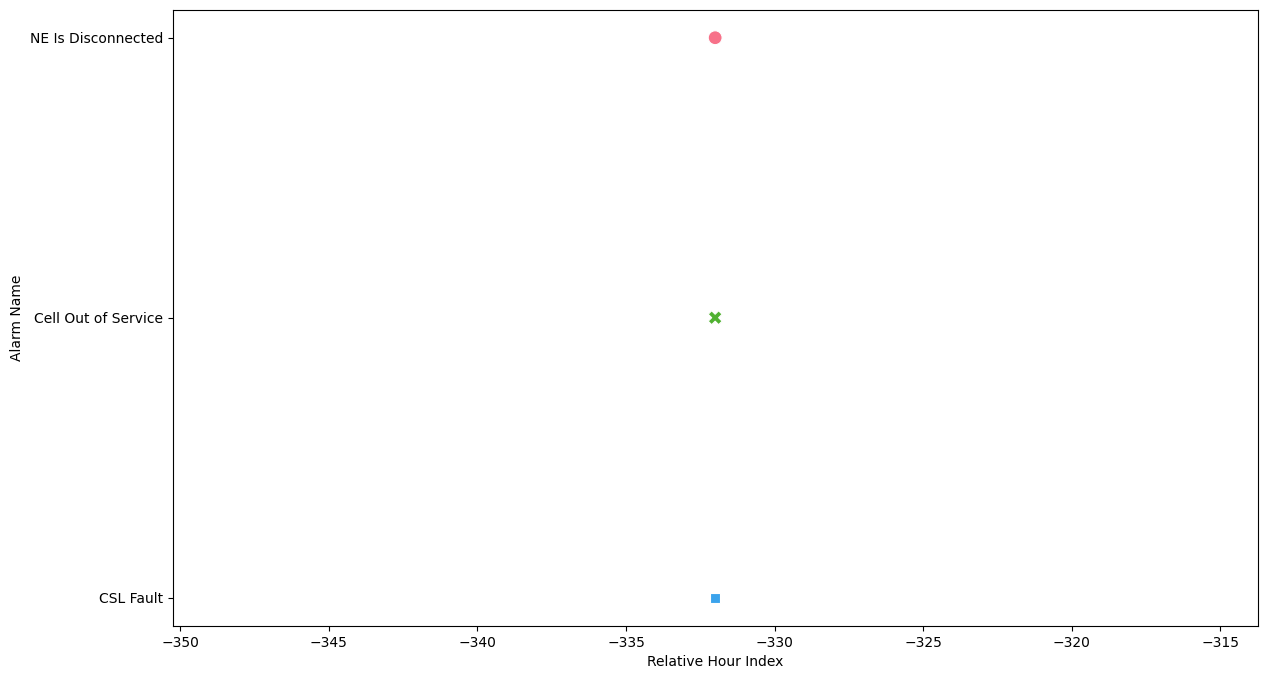

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Filter for specific cell indexes and other cell indexes
cell_indexes_to_plot = [1315, 1316, 1317, 1318]
df_specific_cells = filtered_data[filtered_data['Cell Index'].isin(cell_indexes_to_plot)]
df_other_cells = filtered_data[~filtered_data['Cell Index'].isin(cell_indexes_to_plot)]

# Plotting
plt.figure(figsize=(14, 8))

# Plot for specific cell indexes
sns.lineplot(data=df_specific_cells, x='Relative Hour Index', y='Alarm Name', hue='Cell Index', palette='Set1', marker='o', label='Specific Cells')

# Plot for other cell indexes with distinct markers for Alarm Names
sns.scatterplot(data=df_other_cells, x='Relative Hour Index', y='Alarm Name', hue='Alarm Name', palette='husl', style='Alarm Name', s=100, label='Other Cells')

# Adding titles and labels
plt.title('Alarms for Specific and Other Cell Indexes')
plt.xlabel('Relative Hour Index')
plt.ylabel('Number of Alarms')
plt.legend(title='Legend')
plt.grid(True)
plt.show()


In [ ]:

# Convert the extracted indices to integers for plotting
filtered_data['Cell Index'] = filtered_data['Cell Index'].astype(int)
filtered_data['Site Index'] = filtered_data['Site Index'].astype(int)

# Filter for CSL Faults and Cell Out of Service alarms
csl_faults = filtered_data[filtered_data['Alarm Name'] == 'CSL Fault']
specific_alarms = filtered_data[filtered_data['Alarm Name'].isin(['Cell Out of Service', 'Mains Failure Alarm', 'NE Is Disconnected', 'CSL Fault'])]

# Create a function to find subsequent alarms after a CSL Fault
def find_subsequent_alarms(csl_faults, specific_alarms):
    result = []
    for index, csl_row in csl_faults.iterrows():
        site_index = csl_row['Site Index']
        subsequent_alarms = specific_alarms[(specific_alarms['Site Index'] == site_index) &
                                            (specific_alarms['Relative Hour Index'] > csl_row['Relative Hour Index'])]
        result.append((csl_row['Relative Hour Index'], site_index, subsequent_alarms))
    return result

# Apply the function to get the subsequent alarms
subsequent_alarms = find_subsequent_alarms(csl_faults, specific_alarms)

# Visualization
colors = {1: 'red', 2: 'blue'}  # Assign colors to specific Cell Indices

for alarm_set in subsequent_alarms:
    csl_time, site_index, alarms = alarm_set
    plt.figure(figsize=(12, 6))
    plt.title(f'Site Index: {site_index} - CSL Fault at {csl_time}')
    plt.xlabel('Relative Hour Index')
    plt.ylabel('Alarms')

    # Create a relative time index for plotting
    relative_times = alarms['Relative Hour Index'] - csl_time

    for i, row in alarms.iterrows():
        color = colors.get(row['Cell Index'], 'green')  # Default to green if not in colors
        plt.scatter(relative_times.loc[i], row['Alarm Name'], color=color, label=row['Alarm Name'] if i == 0 else "")

    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
# Include all relevant columns in the get_dummies function
filtered_data = pd.get_dummies(filtered_data, columns=[ 'Alarm Name', 'Vendor', 'Domain', 'Device Type'])

filtered_data.head(20)

